In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt


In [3]:
iris_path = '/Users/joshua/Development/machine-learning/data/iris_dataset.csv'

In [4]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris_df = pd.read_csv(iris_path, header=None, names=names)
iris_df.shape

(150, 5)

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# set x
X = iris_df.iloc[:,0:4]

# set y
y = iris_df['class']

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

In [7]:
# Setting parameters
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
prediction = knn.predict(X_test)

In [10]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, prediction))

0.98


## Performance Tuning

In [11]:
sequential_list = list(range(1,20))
odd_rows = list(filter(lambda x: x % 2 != 0, sequential_list))

In [12]:
cross_validation_score = []

In [13]:
# Loop for a 10 fold cross validation check. 
# Looking to minimize score

for k in odd_rows:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_validation_score.append(scores.mean())

The optimal number of neighbors is 3


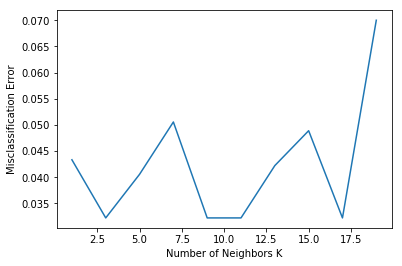

In [14]:
# changing to misclassification error
MSE = [1 - x for x in cross_validation_score]

# determining best k
optimal_k = odd_rows[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(odd_rows, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
